In [1]:
import pandas as pd
import random
import numpy as np
from tqdm import tqdm
import ipdb
import re
import csv
import umap
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
# import mplcursors
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid', context='notebook', rc={'figure.figsize':(14,10)}, font_scale=2)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# Set random seeds for reproducibility on a specific machine
random.seed(1)
np.random.seed(1)
np.random.RandomState(1)


layer=11

# Load the representations
reps_cls = np.load('../reps/hate_layer_' + str(layer) + '.npy')   
# I need only the CLS representation

# Load dataframes to get dialect
df_aave = pd.read_csv('../dialect_data/aave_samples.tsv', sep='\t', quoting=csv.QUOTE_NONE)
df_aave['dialect'] = 1
df_aave['id'] = df_aave.index

df_sae = pd.read_csv('../dialect_data/sae_samples.tsv', sep='\t', quoting=csv.QUOTE_NONE)
df_sae['dialect'] = 0
df_sae['id'] = df_sae.index

df = pd.concat([df_aave, df_sae])
df.reset_index(inplace=True, drop=True)
dialect = df['dialect'].values

In [3]:
# UMAP parameters
n_neighbors = 15
min_dist = 0.1
n_components = 2
metric = 'euclidean'

reducer = umap.UMAP(n_neighbors=n_neighbors,
                    min_dist=min_dist,
                    n_components=n_components,
                    metric=metric,
                    verbose=True,
                    random_state=1)
embedding = reducer.fit_transform(reps_cls)

UMAP(random_state=1, verbose=True)
Sat Apr  9 09:12:05 2022 Construct fuzzy simplicial set


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Sat Apr  9 09:12:13 2022 Finding Nearest Neighbors
Sat Apr  9 09:12:15 2022 Finished Nearest Neighbor Search
Sat Apr  9 09:12:16 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Apr  9 09:12:22 2022 Finished embedding


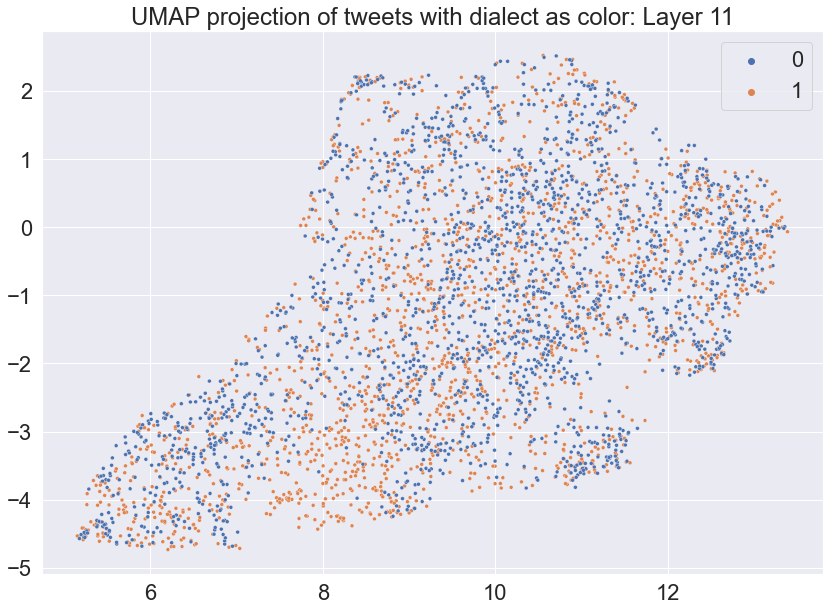

In [4]:
# %matplotlib notebook
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=dialect, s=15)
plt.title(f'UMAP projection of tweets with dialect as color: Layer {layer}')



# annotations = [str(i) for i in range(len(dialect))]
# for i, label in enumerate(annotations):
#     if i in [10, 2030]:
#         plt.annotate(label, (embedding[i, 0], embedding[i, 1]), fontsize=25)

# annotations = df['tweet'].tolist()
# mplcursors.cursor(multiple = True).connect(
#     "add", lambda sel: sel.annotation.set_text(
#           annotations[sel.target.index]
# ))
    
plt.legend()
plt.savefig(f'UMAP-Layer-{layer}', transparent=True)

What is the difference between these two clusters??

Left cluster tweets:
- oh i dunnno, maybe they are. But they are usually closed mondays, which is when I usually want pho
- u guys r so CORNY! Ha get it. Cause the dogs nickname is.. Ahh fuck it.
- i cant tell u much right now homie bc Kobe & KD playin, but u gotta be encouraged and determined. Great success doesnt come easy.
- 	moss a good idea, but I wouldn't tell you to get reed. I think the defense is fine, they've found the formula.

Right cluster tweets:
- I liked ciaras performance 2 & dats bout it bt others wasnt bad. Wish asap rocky performed & others I guess.
- Been waiting on phone call for TWO days...damn!" It's safe to say they not calling lol
- Have you ever noticed ppl say 'that's funny' when they want to acknowledge you tried to be humorous but don't want to say you failed
- Success is not measured by what you accomplish, but by the opposition you have encountered, and the courage
- yep i gave the bag back tuesday.. But now i think im coming down with a cold

My best guess: The 2 clusters are for different dialects - its just that some pairs are much more separable than other pairs. 'Prototypes' right one is AAVE prototype and left one is SAE.

In [5]:
tsne_embedding = TSNE(n_components=2).fit_transform(reps_cls)

/Users/venkat/miniconda3/envs/inlp/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/venkat/miniconda3/envs/inlp/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


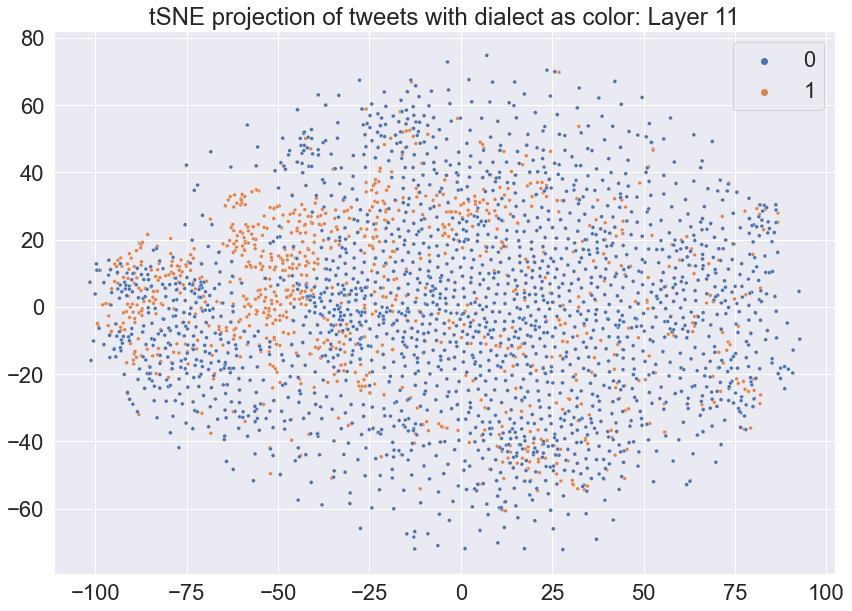

In [6]:
sns.scatterplot(x=tsne_embedding[:, 0], y=tsne_embedding[:, 1], hue=dialect, s=15)
plt.title(f'tSNE projection of tweets with dialect as color: Layer {layer}')



# annotations = [str(i) for i in range(len(dialect))]
# for i, label in enumerate(annotations):
#     if i in [10, 2030]:
#         plt.annotate(label, (embedding[i, 0], embedding[i, 1]), fontsize=25)

# annotations = df['tweet'].tolist()
# mplcursors.cursor(multiple = True).connect(
#     "add", lambda sel: sel.annotation.set_text(
#           annotations[sel.target.index]
# ))
    
plt.legend()
plt.savefig(f'tSNE-Layer-{layer}', transparent=True)